In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
res = []
for i in ['ic', 'ki', 'ec', 'kd']:

    df = pd.read_csv('./%s.csv' % i,sep=';')
    # drop the compounds that has no pChEMBL Value 
    df = df.iloc[df['pChEMBL Value'].dropna().index]
    df = df[["Molecule ChEMBL ID", 'Smiles', 'pChEMBL Value']]
    df.columns = ['ID', 'smiles', 'pCheMBL', ]
    df['Assay'] = i
    res.append(df)

In [3]:
df = pd.concat(res).reset_index(drop=True)
df['Class'] = df.pCheMBL.apply(lambda x: 1 if x > 7 else 0) #inhibitor condition, pChembl > 7

In [4]:
df

,ID,smiles,pCheMBL,Assay,Class
0,CHEMBL1923700,C[C@H](NC(=O)c1cc(-c2nc3ccccc3[nH]2)cc(N(C)S(C...,5.97,ic,0
1,CHEMBL2181911,CO[C@H](C)C(=O)N[C@@H](Cc1cccc(-c2nccs2)c1)[C@...,8.00,ic,1
2,CHEMBL2181907,C#Cc1ccc(F)c(C[C@H](NC(=O)COC)[C@H](O)CN[C@H]2...,7.96,ic,1
3,CHEMBL2181911,CO[C@H](C)C(=O)N[C@@H](Cc1cccc(-c2nccs2)c1)[C@...,8.26,ic,1
4,CHEMBL2181890,COCC(=O)N[C@@H](Cc1cccc(-c2ncco2)c1)[C@H](O)CN...,8.02,ic,1
...,...,...,...,...,...
9223,CHEMBL4128727,CCOc1cccc(-c2nc(SC(C(N)=O)c3nc(-c4ccc([N+](=O)...,5.91,kd,0
9224,CHEMBL4128447,COc1cccc(-c2nc(SCC(=O)Nc3nc(-c4cc(Cl)c(N)c(Cl)...,6.77,kd,0
9225,CHEMBL4127412,N#Cc1c(-c2cccc(C(F)(F)F)c2)nc(SCC(=O)Nc2nc(-c3...,5.88,kd,0
9226,CHEMBL4127550,N#Cc1c(-c2cccc(OC(F)(F)F)c2)nc(SC(C(N)=O)c2nc(...,5.73,kd,0


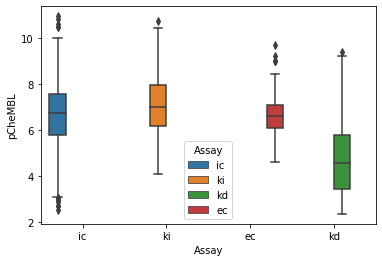

In [5]:
hue_order = ['ic', 'ki', 'kd', 'ec']
sns.boxplot(x = 'Assay',y = 'pCheMBL',data = df, hue = 'Assay', hue_order = hue_order)

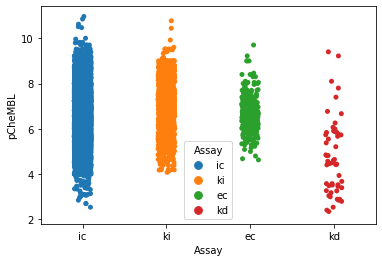

In [6]:
hue_order = ['ic', 'ki', 'ec', 'kd']
sns.stripplot(x = 'Assay',y = 'pCheMBL',data = df, hue = 'Assay', hue_order = hue_order)

In [7]:
df.groupby('Class').size()

Class
0    5352
1    3876
dtype: int64

## remove duplicates

In [8]:
from rdkit import Chem

In [9]:
toCanonical = lambda x:Chem.MolToSmiles(Chem.MolFromSmiles(x), canonical=True)

In [10]:
df.smiles = df.smiles.apply(toCanonical)

In [11]:
df_nodup = df.drop_duplicates('smiles')

In [12]:
df.shape, df_nodup.shape

((9228, 5), (6149, 5))

In [13]:
dfo = pd.read_csv('../data/bace.csv')

In [14]:
dfo.smiles = dfo.smiles.apply(toCanonical)

## remove the same data with the molnet bace dataset

In [15]:
df_nodup_exclude_bace = df_nodup[~df_nodup.smiles.isin(dfo.smiles)]
dfn = df_nodup_exclude_bace.reset_index(drop=True)

In [16]:
dfn.set_index('ID').to_csv('../data/bace_chembl.csv')

In [17]:
dfn.groupby(['Assay', 'Class']).size()

Assay  Class
ec     0           1
ic     0        3024
       1        1988
kd     0          12
       1           2
ki     0         390
       1         303
dtype: int64

In [18]:
len(dfn)

5720

In [4]:
import pandas as pd
a = pd.read_csv('../data/bace_chembl.csv')

In [5]:
a.Class.value_counts()

0    3427
1    2293
Name: Class, dtype: int64